In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [3]:
df.set_index('Date',inplace=True)

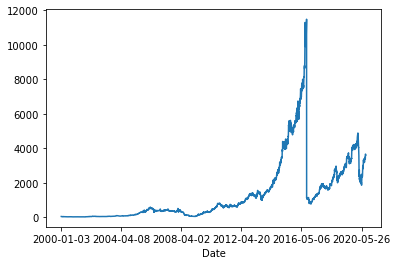

In [4]:
df['VWAP'].plot()

In [5]:
df.shape

(5070, 14)

In [6]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
df.shape

(2291, 14)

In [10]:
data=df.copy()

In [11]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [12]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [13]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=4
window2=6

In [14]:
for feature in lag_features:
    data[feature+'rolling_mean_4']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_6']=data[feature].rolling(window=window2).mean()

In [15]:
for feature in lag_features:
    data[feature+'rolling_std_4']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_6']=data[feature].rolling(window=window2).std()

In [16]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_4,Highrolling_std_6,Lowrolling_std_4,Lowrolling_std_6,Volumerolling_std_4,Volumerolling_std_6,Turnoverrolling_std_4,Turnoverrolling_std_6,Tradesrolling_std_4,Tradesrolling_std_6
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.905256,NaN,4.115697,NaN,23258.188651,NaN,1.453844e+12,NaN,581.658190,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,7.756113,NaN,7.722626,NaN,23388.259268,NaN,1.462807e+12,NaN,121.498971,NaN


In [17]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_4', 'Highrolling_mean_6',
       'Lowrolling_mean_4', 'Lowrolling_mean_6', 'Volumerolling_mean_4',
       'Volumerolling_mean_6', 'Turnoverrolling_mean_4',
       'Turnoverrolling_mean_6', 'Tradesrolling_mean_4',
       'Tradesrolling_mean_6', 'Highrolling_std_4', 'Highrolling_std_6',
       'Lowrolling_std_4', 'Lowrolling_std_6', 'Volumerolling_std_4',
       'Volumerolling_std_6', 'Turnoverrolling_std_4', 'Turnoverrolling_std_6',
       'Tradesrolling_std_4', 'Tradesrolling_std_6'],
      dtype='object')

In [18]:
data.shape

(2291, 34)

In [19]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_4        3
Highrolling_mean_6        5
Lowrolling_mean_4         3
Lowrolling_mean_6         5
Volumerolling_mean_4      3
Volumerolling_mean_6      5
Turnoverrolling_mean_4    3
Turnoverrolling_mean_6    5
Tradesrolling_mean_4      3
Tradesrolling_mean_6      5
Highrolling_std_4         3
Highrolling_std_6         5
Lowrolling_std_4          3
Lowrolling_std_6          5
Volumerolling_std_4       3
Volumerolling_std_6       5
Turnoverrolling_std_4     3
Turnoverrolling_std_6     5
Tradesrolling_std_4       3
Tradesrolling_std_6       5
dtype: int64

In [20]:
data.dropna(inplace=True)

In [21]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_4', 'Highrolling_mean_6',
       'Lowrolling_mean_4', 'Lowrolling_mean_6', 'Volumerolling_mean_4',
       'Volumerolling_mean_6', 'Turnoverrolling_mean_4',
       'Turnoverrolling_mean_6', 'Tradesrolling_mean_4',
       'Tradesrolling_mean_6', 'Highrolling_std_4', 'Highrolling_std_6',
       'Lowrolling_std_4', 'Lowrolling_std_6', 'Volumerolling_std_4',
       'Volumerolling_std_6', 'Turnoverrolling_std_4', 'Turnoverrolling_std_6',
       'Tradesrolling_std_4', 'Tradesrolling_std_6'],
      dtype='object')

In [22]:
ind_features=['Highrolling_mean_4', 'Highrolling_mean_6',
       'Lowrolling_mean_4', 'Lowrolling_mean_6', 'Volumerolling_mean_4',
       'Volumerolling_mean_6', 'Turnoverrolling_mean_4',
       'Turnoverrolling_mean_6', 'Tradesrolling_mean_4',
       'Tradesrolling_mean_6', 'Highrolling_std_4', 'Highrolling_std_6',
       'Lowrolling_std_4', 'Lowrolling_std_6', 'Volumerolling_std_4',
       'Volumerolling_std_6', 'Turnoverrolling_std_4', 'Turnoverrolling_std_6',
       'Tradesrolling_std_4', 'Tradesrolling_std_6']

In [23]:
training_data=data[0:1800]
test_data=data[1800:]

In [24]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_4,Highrolling_std_6,Lowrolling_std_4,Lowrolling_std_6,Volumerolling_std_4,Volumerolling_std_6,Turnoverrolling_std_4,Turnoverrolling_std_6,Tradesrolling_std_4,Tradesrolling_std_6
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-08,BAJFINANCE,EQ,619.15,604.00,645.00,604.00,633.25,635.60,634.65,26863,...,9.145616,7.135574,7.609575,7.355978,21749.900097,19187.013014,1.363766e+12,1.202647e+12,334.004366,489.914584
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,10.492487,8.147786,12.274185,10.298078,13595.208641,19308.038271,8.724705e+11,1.214123e+12,356.270496,329.034193
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,11.478313,8.988938,12.604587,10.170447,12003.625268,17428.136684,7.688789e+11,1.096724e+12,445.686736,483.519355
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,9.544326,10.394586,10.666566,9.876470,12995.810463,13538.126916,8.291264e+11,8.656443e+11,455.682912,461.505652
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.120355,11.038327,6.138472,10.040551,15187.551841,13511.568294,9.696017e+11,8.630900e+11,555.379450,473.942472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-03,BAJFINANCE,EQ,2856.60,2880.00,2880.00,2715.30,2720.10,2724.05,2794.49,2516840,...,53.719462,42.928752,99.404388,85.865171,557663.279463,531207.237259,1.465819e+14,1.422884e+14,18731.458626,21651.735087
2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,...,95.192813,86.267369,110.576176,111.325848,670042.908533,624719.650044,1.724914e+14,1.601872e+14,9263.290753,16377.197755
2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,...,89.922675,104.027357,78.589540,119.252868,608690.358574,571475.705083,1.632861e+14,1.472590e+14,18196.479208,18746.477007


In [25]:
pip install pmdarima --user

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [27]:
from pmdarima import auto_arima

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21716.647, Time=8.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22101.866, Time=5.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22040.247, Time=6.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21956.793, Time=8.89 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33793.379, Time=5.33 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=21712.975, Time=9.80 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=21710.805, Time=10.30 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=21712.985, Time=11.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=21796.696, Time=10.40 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=21717.390, Time=14.30 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=21709.467, Time=10.92 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21955.015, Time=9.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=21711.631, Time=10.48 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=21711.666, Time=10.91 sec
 ARIMA(1,0,1

In [30]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(0, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [31]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [32]:
test_data['Forecast_ARIMA']=forecast

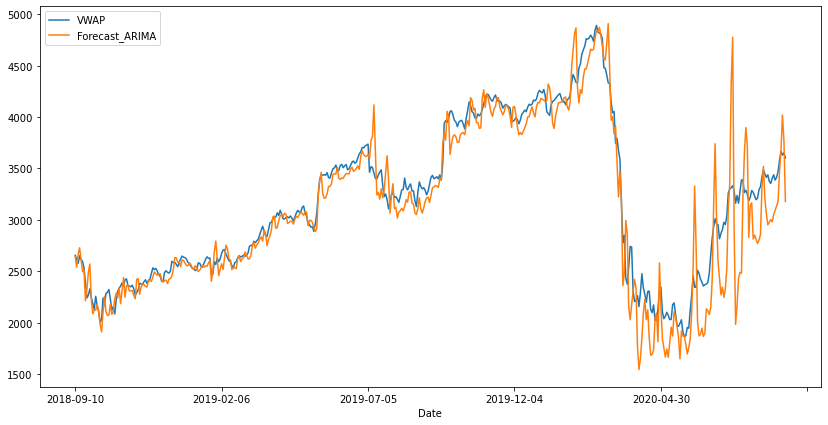

In [33]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

248.40329882589563

In [36]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

162.86082789518923